# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

type(data)

sklearn.utils.Bunch

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
# Load libraries

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = data.data

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# Create k-mean object
cluster = KMeans(n_clusters=8, random_state=0, n_jobs=-1)

# Train model
model = cluster.fit(features_std)

# Silhouette Score
from sklearn.metrics import silhouette_score

preds = cluster.fit_predict(features)
centers = cluster.cluster_centers_

score = silhouette_score (features, preds, metric='euclidean')
print(score)
#print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

0.5486213604076143


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [4]:
# Create k-mean object
cluster_5 = KMeans(n_clusters=5, random_state=0, n_jobs=-1)

# Train model
model = cluster_5.fit(features_std)

# Silhouette Score

preds_5 = cluster_5.fit_predict(features)
centers_5 = cluster_5.cluster_centers_

score_5 = silhouette_score (features, preds_5, metric='euclidean')
print(score_5)

0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [5]:
# Create k-mean object
cluster_3 = KMeans(n_clusters=3, random_state=0, n_jobs=-1)

# Train model
model = cluster_3.fit(features_std)

# Silhouette Score

preds_3 = cluster_3.fit_predict(features)
centers_3 = cluster_3.cluster_centers_

score_3 = silhouette_score (features, preds_3, metric='euclidean')
print(score_3)

0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [6]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


/usr/local/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


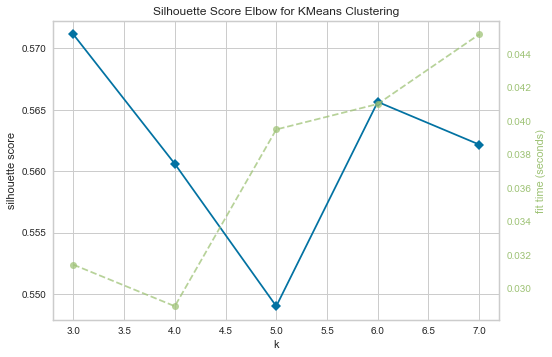

In [7]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,8), metric ='silhouette')
visualizer.fit(features)
visualizer.poof()

In [8]:
# best score with 3 clusters.

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [9]:
# Load libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# Create meanshift object
cluster = AgglomerativeClustering(n_clusters=3)

# Train model
model = cluster.fit(features_std)

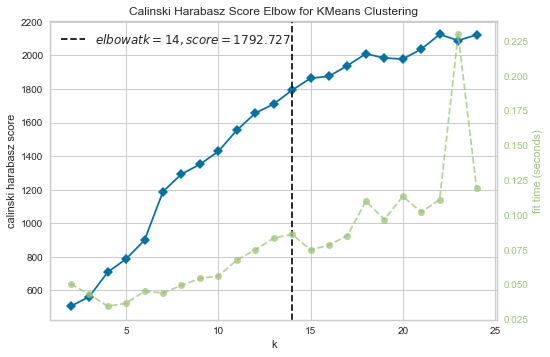

In [16]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,25), metric ='calinski_harabasz')
visualizer.fit(features)
visualizer.poof()

In [ ]:
# metric ='calinski_harabasz' <-- is this metric correct?

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

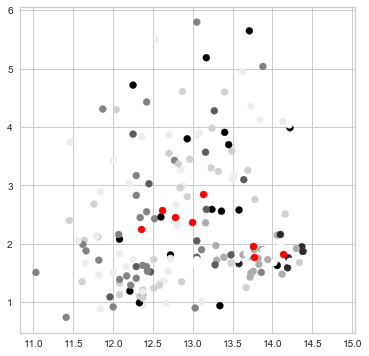

In [17]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 8 clusters 

plt.figure(figsize=(6,6))
plt.scatter(features[:, 0], features[:, 1], c=preds)

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)#, alpha=0.75)

plt.show()

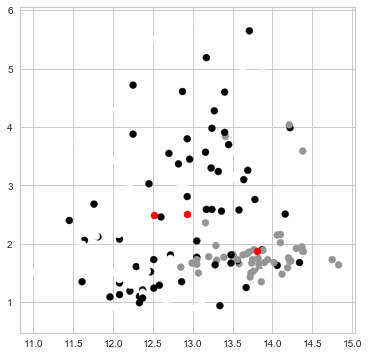

In [20]:
# 3 Clusters

plt.figure(figsize=(6,6))
plt.scatter(features[:, 0], features[:, 1], c=preds_3)

plt.scatter(centers_3[:, 0], centers_3[:, 1], c='red', s=50)#, alpha=0.75)

plt.show()

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [11]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA

# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# ica = FastICA(n_components=0.99, whiten=True)

# Conduct PCA
features_pca = pca.fit_transform(features)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 13
Reduced number of features: 1


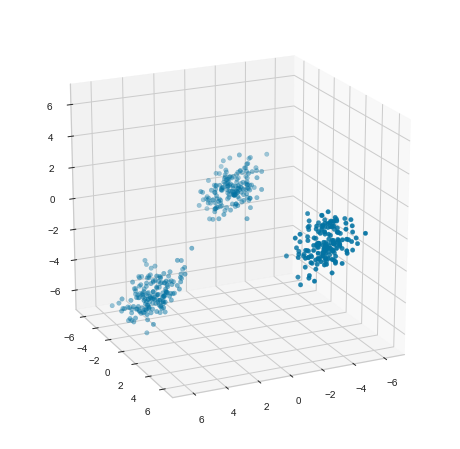

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

X, _ = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=1.0)

X = np.c_[X, 0.5 * np.random.randn(X.shape[0], 1)]

rot = R.from_euler('y', 45, degrees=True)
X = rot.apply(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)

ax.view_init(elev=20, azim=65)
plt.show()

## Bonus

## Generate a series of t-SNE plots showing the clusters at a variety of perplexities.